In [118]:
pip install feedparser

Note: you may need to restart the kernel to use updated packages.


In [119]:
#import feedparser
#import pandas as pd

# RSS feed URL
#rss_url = "https://finance.yahoo.com/rss/topstories"

# Parse feed
#feed = feedparser.parse(rss_url)

# Collect entries
#headlines = []
#for entry in feed.entries:
   # headlines.append({
   #     'title': entry.title,
   #     'link': entry.link,
   #     'published': entry.published,
   #     'source': "Yahoo Finance"
  #  })

# Convert to DataFrame
#df = pd.DataFrame(headlines)

# Preview
#print(df.head())

In [143]:
import feedparser
import pandas as pd

rss_feeds = [
    "https://finance.yahoo.com/rss/topstories",
    "https://feeds.marketwatch.com/marketwatch/topstories",
    "http://feeds.reuters.com/reuters/businessNews",
    "https://www.investing.com/rss/news_25.rss"  # Stock market news
]

import feedparser
import pandas as pd

headlines = []

for url in rss_feeds:
    feed = feedparser.parse(url)
    for entry in feed.entries:
        headlines.append({
            'title': entry.title,
            'link': entry.link,
            'published': entry.published,
            'source': url.split("//")[1].split("/")[0]
        })

df = pd.DataFrame(headlines)
df["published"] = pd.to_datetime(df["published"], format="mixed", errors="coerce")



/var/folders/5p/_q2tc1jj6tg91kd4r1rpgl480000gn/T/ipykernel_43176/612929232.py:27: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["published"] = pd.to_datetime(df["published"], format="mixed", errors="coerce")


In [145]:
df["published"] = pd.to_datetime(df["published"], format="mixed", errors="coerce")


In [147]:
df = df.dropna(subset=["published"])


In [149]:
pip install nltk spacy

Note: you may need to restart the kernel to use updated packages.


In [150]:
pip install "pydantic<2.0"


Note: you may need to restart the kernel to use updated packages.


In [151]:
!python -m nltk.downloader stopwords
!python -m spacy download en_core_web_sm

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shacheesb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [153]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords

In [165]:
rss_feeds = [
    "https://finance.yahoo.com/rss/topstories",
    "https://feeds.marketwatch.com/marketwatch/topstories/",
    "http://feeds.reuters.com/reuters/businessNews",
    "https://www.cnbc.com/id/100003114/device/rss/rss.html"
]
headlines = []

for url in rss_feeds:
    feed = feedparser.parse(url)
    for entry in feed.entries:
        headlines.append({
            'title': entry.title,
            'link': entry.link,
            'published': entry.published,
            'source': url.split("//")[1].split("/")[0]  # e.g. reuters.com, cnbc.com
        })
df = pd.DataFrame(headlines)
df["published"] = pd.to_datetime(df["published"], format="mixed", errors="coerce")
df = df.dropna(subset=["published"])

# Clean titles
df["cleaned_title"] = df["title"].apply(preprocess_text)

df[["title","cleaned_title"]].head()

,title,cleaned_title
0,Hewlett Packard Enterprise Company (HPE): Jim ...,hewlett packard enterprise company hpe jim cra...
1,"Macy's, Kohl's close department stores as they...",macys kohls close department store struggle re...
2,Intel's new CEO might have the last best chanc...,intel new ceo good chance turn company
3,Go Big on Defense. It’s What Has Worked for In...,big defense work investor month
4,Poste to become Telecom Italia's No.1 investor...,poste telecom italia investor buy vivendi


In [167]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

sid = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df["sentiment"] = df["title"].apply(lambda x: sid.polarity_scores(x)["compound"])

# Preview results
df[["title", "sentiment"]].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shacheesb/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,title,sentiment
0,Hewlett Packard Enterprise Company (HPE): Jim ...,-0.3400
1,"Macy's, Kohl's close department stores as they...",-0.3182
2,Intel's new CEO might have the last best chanc...,0.7351
3,Go Big on Defense. It’s What Has Worked for In...,0.1280
4,Poste to become Telecom Italia's No.1 investor...,0.0000


In [169]:
def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_label"] = df["sentiment"].apply(classify_sentiment)
df[["title", "sentiment", "sentiment_label"]].head()


,title,sentiment,sentiment_label
0,Hewlett Packard Enterprise Company (HPE): Jim ...,-0.3400,Negative
1,"Macy's, Kohl's close department stores as they...",-0.3182,Negative
2,Intel's new CEO might have the last best chanc...,0.7351,Positive
3,Go Big on Defense. It’s What Has Worked for In...,0.1280,Positive
4,Poste to become Telecom Italia's No.1 investor...,0.0000,Neutral


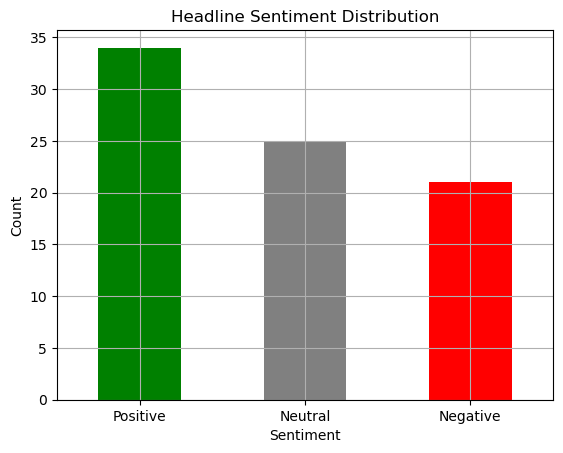

In [171]:
import matplotlib.pyplot as plt

df["sentiment_label"].value_counts().plot(kind="bar", color=["green", "gray", "red"])
plt.title("Headline Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [173]:
df.to_csv("sentiment_headlines.csv", index=False)


In [175]:
pip install yfinance ta


Note: you may need to restart the kernel to use updated packages.


In [179]:
import yfinance as yf

# Define time window based on your headline dates
start_date = df["published"].min().strftime('%Y-%m-%d')
end_date = df["published"].max().strftime('%Y-%m-%d')

# Download price data
stock = yf.download("AAPL", start=start_date, end=end_date, interval="1d")
stock.reset_index(inplace=True)
stock = stock[["Date", "Open", "Close", "Volume"]]
stock["Date"] = pd.to_datetime(stock["Date"])



[*********************100%***********************]  1 of 1 completed


In [181]:
df["published"] = pd.to_datetime(df["published"])
df["date"] = df["published"].dt.date

# Daily average sentiment
daily_sentiment = df.groupby("date")["sentiment"].mean().reset_index()
daily_sentiment.columns = ["Date", "avg_sentiment"]
daily_sentiment["Date"] = pd.to_datetime(daily_sentiment["Date"])


In [183]:
# Ensure 'Date' is a flat column, not part of a MultiIndex
if isinstance(stock.columns, pd.MultiIndex):
    stock.columns = stock.columns.get_level_values(0)  # flatten column names

# Reset index (in case 'Date' is still the index)
stock.reset_index(inplace=True)

# Make sure both 'Date' columns are datetime
stock["Date"] = pd.to_datetime(stock["Date"])
daily_sentiment["Date"] = pd.to_datetime(daily_sentiment["Date"])

# Now merge safely
merged = pd.merge(stock, daily_sentiment, on="Date", how="left")


In [185]:
import numpy as np

# Lagged returns
merged["return"] = merged["Close"].pct_change()
merged["return_lag1"] = merged["return"].shift(1)

# Rolling volatility (5-day)
merged["volatility_2d"] = merged["return"].rolling(2).std()

# Rolling sentiment average
merged["sentiment_2d_avg"] = merged["avg_sentiment"].rolling(2).mean()

# Future return (target)
merged["target_return"] = merged["Close"].shift(-1) / merged["Close"] - 1
merged["target"] = (merged["target_return"] > 0).astype(int)  # 1 = price up, 0 = down


In [207]:
# Save your final merged DataFrame to a CSV
merged.to_csv("sentiment_strategy_data.csv", index=False)


In [187]:
features = [
    "avg_sentiment", "sentiment_2d_avg", "return_lag1", "volatility_2d"
]
X = merged[features].dropna()
y = merged["target"].loc[X.index]


In [189]:
split_index = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [191]:
features = ["avg_sentiment", "sentiment_2d_avg", "return_lag1", "volatility_2d"]
print(merged[features].isnull().sum())
print("Total rows before drop:", len(merged))


avg_sentiment       1
sentiment_2d_avg    3
return_lag1         2
volatility_2d       2
dtype: int64
Total rows before drop: 4


In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Predict on the same data (not for real use, just testing)
y_pred = rf.predict(X)

# Evaluation
print("Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [197]:
merged["prediction"] = rf.predict(merged[features])


In [199]:
# Strategy: go long if model predicts price will go up
merged["strategy_return"] = merged["prediction"] * merged["target_return"]

# Cumulative return over time
merged["cumulative_strategy"] = (1 + merged["strategy_return"]).cumprod()
merged["cumulative_stock"] = (1 + merged["target_return"]).cumprod()


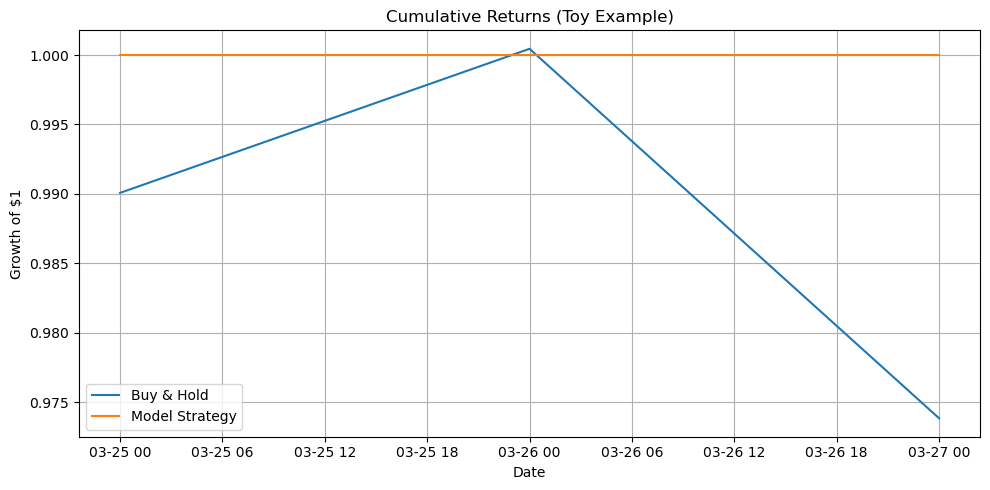

In [201]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(merged["Date"], merged["cumulative_stock"], label="Buy & Hold")
plt.plot(merged["Date"], merged["cumulative_strategy"], label="Model Strategy")
plt.title("Cumulative Returns (Toy Example)")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [203]:
# Calculate daily strategy returns (already done if you followed previous steps)
# merged["strategy_return"] = merged["prediction"] * merged["target_return"]

# Drop NaNs just in case
strategy_returns = merged["strategy_return"].dropna()

# Calculate Sharpe Ratio
sharpe_ratio = (strategy_returns.mean() / strategy_returns.std()) * (252**0.5)  # Annualized
print("Sharpe Ratio (strategy):", round(sharpe_ratio, 3))


Sharpe Ratio (strategy): nan


/var/folders/5p/_q2tc1jj6tg91kd4r1rpgl480000gn/T/ipykernel_43176/3117733466.py:8: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_ratio = (strategy_returns.mean() / strategy_returns.std()) * (252**0.5)  # Annualized


In [205]:
buy_hold_returns = merged["target_return"].dropna()
sharpe_bh = (buy_hold_returns.mean() / buy_hold_returns.std()) * (252**0.5)
print("Sharpe Ratio (buy & hold):", round(sharpe_bh, 3))


Sharpe Ratio (buy & hold): -7.422
